In [1]:
import os
import glob
import librosa
import numpy as np
import soundfile as sf



def time_stretch(filename, output_file, speed_factor):
    # Load the audio file
    audio, sample_rate = librosa.load(filename, sr=None)

    # Apply time stretching to the whole audio file
    stretched_audio = librosa.effects.time_stretch(audio, speed_factor)

    # Save the transformed audio file
    sf.write(output_file, stretched_audio, sample_rate)

input_folder = 'lt400'
output_folder = 'output_folder'
stretch_values = [ 0.95, 0.98 , 1.02, 1.05]

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for desired_stretch in stretch_values:
    output_folder = os.path.join(output_folder, f'stretch{desired_stretch}')
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for file in glob.glob(os.path.join(input_folder, '*.wav')):
        output_filename = os.path.join(output_folder, os.path.basename(file))
        time_stretch(file, output_filename, desired_stretch)



/tmp/ipykernel_7712/2369393405.py:14: FutureWarning: Pass rate=0.95 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched_audio = librosa.effects.time_stretch(audio, speed_factor)
/tmp/ipykernel_7712/2369393405.py:14: FutureWarning: Pass rate=0.95 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched_audio = librosa.effects.time_stretch(audio, speed_factor)
/tmp/ipykernel_7712/2369393405.py:14: FutureWarning: Pass rate=0.98 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched_audio = librosa.effects.time_stretch(audio, speed_factor)
/tmp/ipykernel_7712/2369393405.py:14: FutureWarning: Pass rate=1.02 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched_audio = librosa.effects.time_stretch(audio, speed_factor)
/tmp/ipykernel_7712/2369393405.py:14: FutureWarning: Pass ra

/tmp/ipykernel_7327/1874817026.py:28: FutureWarning: Pass rate=1.2 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  stretched_audio = librosa.effects.time_stretch(audio, speed_factor)


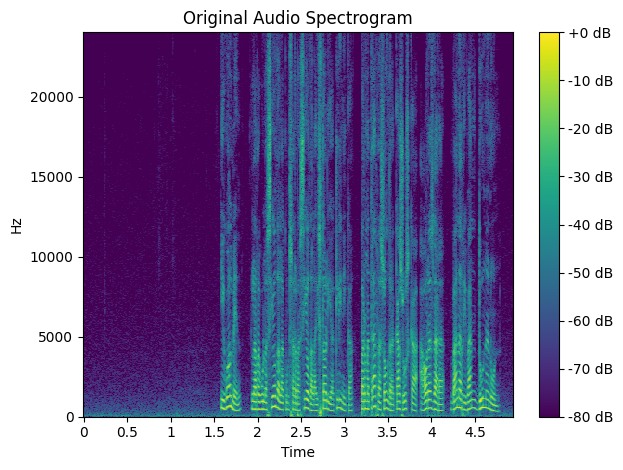

/home/lucastakanori/.local/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: 'upc_ca_ona_100000STRETCH2.wav'

In [2]:
import os
import glob
import librosa
import numpy as np
import soundfile as sf

import librosa
import librosa.display
import soundfile as sf
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

def plot_spectrogram(audio, sample_rate, title):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    plt.figure()
    librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='linear', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

def time_stretch(filename, output_file, speed_factor):
    # Load the audio file
    audio, sample_rate = librosa.load(filename, sr=None)

    # Apply time stretching to the whole audio file
    stretched_audio = librosa.effects.time_stretch(audio, speed_factor)

    # Save the transformed audio file
    sf.write(output_file, stretched_audio, sample_rate)
      


time_stretch("upc_ca_ona_100000.wav","upc_ca_ona_100000STRETCHLB12.wav",1.2)


audio, sample_rate = librosa.load("upc_ca_ona_100000.wav", sr=None)


plot_spectrogram(audio, 48000, 'Original Audio Spectrogram')

audio, sample_rate = librosa.load("upc_ca_ona_100000STRETCH2.wav", sr=None)

plot_spectrogram(audio, 48000, 'STRETCH 2 Audio Spectrogram')


tensor(1.0364)
tensor(4.5486)


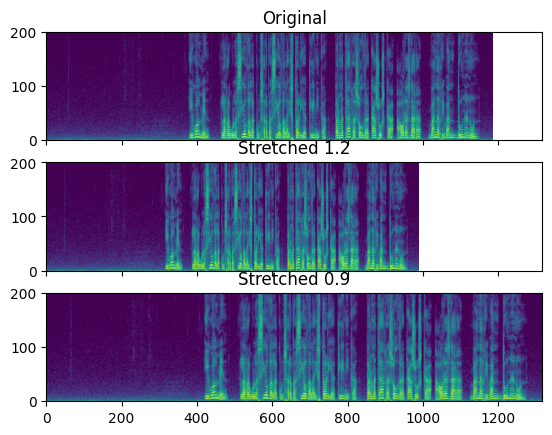

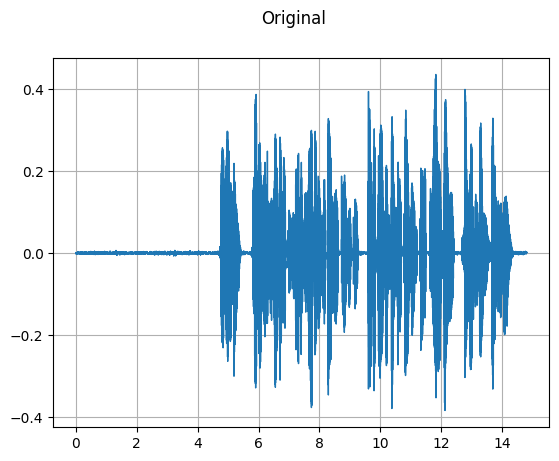

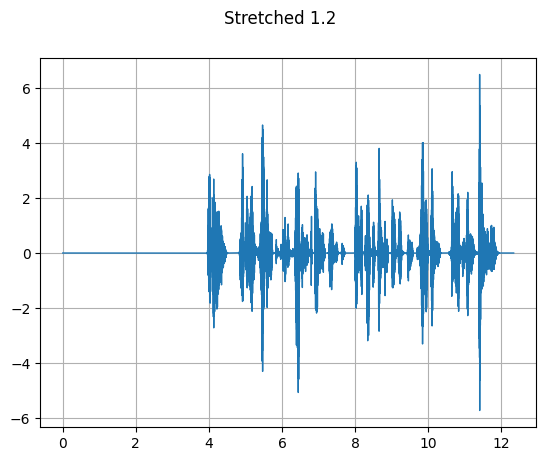

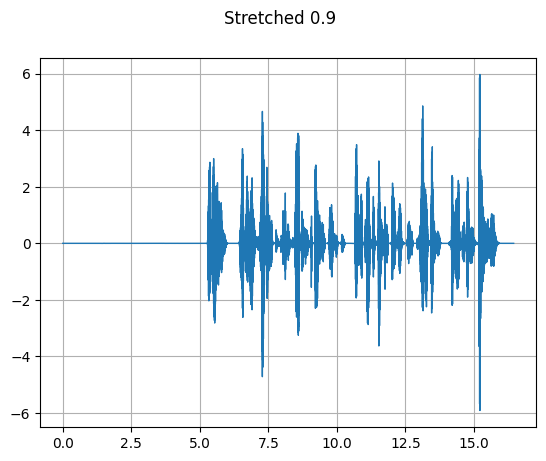

In [2]:
import torchaudio
import torch
import librosa
import matplotlib.pyplot as plt
import torchmetrics
from torchmetrics.audio import PerceptualEvaluationSpeechQuality

def plot_spec(ax, spec, title, ylabel="freq_bin"):
    ax.set_title(title)
    ax.imshow(librosa.power_to_db(spec), origin="lower", aspect="auto") 

def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)

# Load the waveform
waveform, sample_rate = torchaudio.load("upc_ca_ona_100000.wav")

# Create a spectrogram
spectrogram_transform = torchaudio.transforms.Spectrogram()
original = spectrogram_transform(waveform)

# Stretch the spectrogram
stretch = torchaudio.transforms.TimeStretch()
stretched_1_2 = stretch(original, 1.2)
stretched_0_9 = stretch(original, 0.9)

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)
plot_spec(axes[0], original[0], title="Original")
plot_spec(axes[1], stretched_1_2[0], title="Stretched 1.2")
plot_spec(axes[2], stretched_0_9[0], title="Stretched 0.9")

# Convert the spectrogram back to a waveform
inverse_spectrogram = torchaudio.transforms.InverseSpectrogram(n_fft=400, win_length=400, hop_length=200)

waveform_1_2 = inverse_spectrogram(stretched_1_2)
waveform_0_9 = inverse_spectrogram(stretched_0_9)

# Convert the spectrogram to a real-valued representation
original_real = original.abs().pow(2)
stretched_1_2_real = stretched_1_2.abs().pow(2)
stretched_0_9_real = stretched_0_9.abs().pow(2)

# Convert the real-valued spectrogram back to a waveform
griffin_lim = torchaudio.transforms.GriffinLim(n_fft=400, win_length=400, hop_length=200, power=2)

waveform_1_2 = griffin_lim(stretched_1_2_real)
waveform_0_9 = griffin_lim(stretched_0_9_real)

plot_waveform(waveform, sample_rate, title="Original", xlim=None)
plot_waveform(waveform_1_2, sample_rate, title="Stretched 1.2", xlim=None)
plot_waveform(waveform_0_9, sample_rate, title="Stretched 0.9", xlim=None)


torchaudio.save("upc_ca_ona_100000TIME12.wav", waveform_1_2, sample_rate, format='wav')
torchaudio.save("upc_ca_ona_100000TIME09.wav", waveform_0_9, sample_rate, format='wav')



import torch.nn.functional as F

# Resize waveform_1_2 to match the size of waveform
waveform_1_2_resized = F.interpolate(waveform_1_2.unsqueeze(0), size=waveform.shape[-1], mode='linear').squeeze(0)

# Calculate PESQ score
nb_pesq = PerceptualEvaluationSpeechQuality(16000, 'wb')
print(nb_pesq(waveform, waveform_1_2_resized))

# waveform3, sample_rate = torchaudio.load("upc_ca_ona_100000PITCHRB12.wav", normalize=True)
# wb_pesq = PerceptualEvaluationSpeechQuality(16000, 'wb')
# print(wb_pesq(waveform, waveform_0_9))

      
      
wb_pesq = PerceptualEvaluationSpeechQuality(16000, 'nb')
print(wb_pesq(waveform, waveform)) 

In [3]:

import os
import glob
import librosa
import numpy as np
import soundfile as sf

import librosa
import librosa.display
import soundfile as sf
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
import torchaudio 

# def plot_spectrogram(audio, sample_rate, title):
#     D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
#     plt.figure()
#     librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='linear', cmap='viridis')
#     plt.colorbar(format='%+2.0f dB')
#     plt.title(title)
#     plt.tight_layout()
#     plt.show()

# def time_stretch(filename, output_file, speed_factor):
#     # Load the audio file
#     audio, sample_rate = librosa.load(filename, sr=None)

#     # Apply time stretching to the whole audio file
#     stretched_audio = librosa.effects.time_stretch(audio, speed_factor)

#     # Save the transformed audio file
#     sf.write(output_file, stretched_audio, sample_rate)
      
import torchaudio

# Load the waveform
waveform, sample_rate = torchaudio.load("upc_ca_ona_100000.wav", normalize=True)

# Create a spectrogram
spectrogram_transform = torchaudio.transforms.Spectrogram()
original = spectrogram_transform(waveform)

# Stretch the spectrogram
stretch = torchaudio.transforms.TimeStretch()
stretched_1_2 = stretch(original, 1.2)
stretched_0_9 = stretch(original, 0.9)

# Convert the spectrogram back to a waveform
griffin_lim = torchaudio.transforms.GriffinLim(n_fft=400, win_length=400, hop_length=200, power=2, normalized=True)
waveform_1_2 = griffin_lim(stretched_1_2)
waveform_0_9 = griffin_lim(stretched_0_9)


#torchaudio.save(output_file, waveform_shift, sample_rate, format='wav')


# time_stretch("upc_ca_ona_100000.wav","upc_ca_ona_100000STRETCHLB12.wav",1.2)


# audio, sample_rate = librosa.load("upc_ca_ona_100000.wav", sr=None)


# plot_spectrogram(audio, 48000, 'Original Audio Spectrogram')

# audio, sample_rate = librosa.load("upc_ca_ona_100000STRETCH2.wav", sr=None)

# plot_spectrogram(audio, 48000, 'STRETCH 2 Audio Spectrogram')



TypeError: GriffinLim.__init__() got an unexpected keyword argument 'normalized'

In [2]:
import os
import json
import wave
import sys
import json
from vosk import Model, KaldiRecognizer, SetLogLevel
import pandas as pd

def transcribe_files_to_tsv(input_folder, output_filename):
    # Set the log level to 0 to disable debug messages
    SetLogLevel(0)

    model = Model(lang="ca")
    transcriptions = []

    # Iterate through all files in the input folder
    for file in os.listdir(input_folder):
        #print(os.path.basename(file))
        if file.endswith(".wav"):
            wf = wave.open(os.path.join(input_folder, file), "rb")
            if wf.getnchannels() != 1 or wf.getsampwidth() != 2 or wf.getcomptype() != "NONE":
                print(f"Audio file {file} must be WAV format mono PCM.")
                continue

            rec = KaldiRecognizer(model, wf.getframerate())
            rec.SetWords(True)
            rec.SetPartialWords(True)

            # Process the audio file
            last = None
            while True:
                data = wf.readframes(4000)
                if len(data) == 0:
                    break      
                if rec.AcceptWaveform(data):
                    last = rec.Result()
                else:
                    rec.PartialResult()             
                #if rec.AcceptWaveform(data):
                    
            result_json = rec.Result()
            result_dict = json.loads(result_json)
            if(result_dict["text"] == ""):
                try:
                    result_dict = json.loads(last)   
                except:
                    print("Error") 
            #results = result_dict["result"]
            #print(os.path.basename(file)+"saved")
            transcriptions.append((os.path.basename(file), result_dict["text"]))
            #print(result_dict["text"])
                    

    # Convert the list of transcriptions to a DataFrame
    transcriptions_df = pd.DataFrame(transcriptions, columns=['filename', 'transcription'])

    # Save the output to a TSV file
    transcriptions_df.to_csv(output_filename, sep="\t", index=False)


import csv
from pathlib import Path
from jiwer import wer
from torchmetrics.functional.audio.pesq import perceptual_evaluation_speech_quality
from scipy.io import wavfile
import warnings
from pesq import cypesq
import torch
import librosa

# Suppress the specific warning messages
warnings.filterwarnings("ignore", message="To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).")

def read_audio_file(file_path):
    data, fs = librosa.load(file_path, sr=16000)
    data = torch.tensor(data, dtype=torch.float32)
    return fs, data

def calculate_pesq(fs, ref_audio, deg_audio, mode):
    # Detach the tensors from the computation graph and move them to the CPU
    ref_audio_detached = ref_audio.detach().cpu()
    deg_audio_detached = deg_audio.detach().cpu()
    
    try:
        # Call the perceptual_evaluation_speech_quality function with PyTorch tensors
        return perceptual_evaluation_speech_quality(ref_audio_detached, deg_audio_detached, fs, mode)
    except cypesq.NoUtterancesError:
        print("No utterances detected in the input audio files.")
        return 1

def pesq_from_paths(ref_file_path, deg_file_path):
    fs_ref, ref_audio = read_audio_file(ref_file_path)
    fs_deg, deg_audio = read_audio_file(deg_file_path)
    # Ensure the sampling frequencies are the same
    assert fs_ref == fs_deg, "Sampling frequencies must be the same" + str(fs_ref) + str(fs_deg)

    # Choose the mode based on the sampling frequency
    mode = 'wb' if fs_ref == 16000 else 'nb'

    if len(ref_audio) > len(deg_audio):
        pad_length = len(ref_audio) - len(deg_audio)
        deg_audio = torch.cat([deg_audio, torch.zeros(pad_length, dtype=torch.float32)])
    elif len(ref_audio) < len(deg_audio):
        deg_audio = deg_audio[:len(ref_audio)]

    # Calculate PESQ score
    pesq_score = calculate_pesq(fs_ref, ref_audio, deg_audio, mode)
    return pesq_score

def read_tsv_file(tsv_file_path):
    # Read the TSV file and store its contents in a dictionary
    tsv_data = {}

    with open(tsv_file_path, "r") as file:
        tsv_file = csv.reader(file, delimiter="\t")
        next(tsv_file)  # Skip header row
        for line in tsv_file:
            if len(line) == 2:
                filename, transcription = line
                tsv_data[filename] = {
                    "transcription": transcription
                }
            else:
                print(f"Skipping line with unexpected number of values: {line}")

    return tsv_data

def calculate_wer_pesq(original_data, augmented_data, output_file_path, stretch):
    # Calculate WER and PESQ for each file
    output = []
    for filename, data in original_data.items():
        original_transcription = data["transcription"]
        if filename in augmented_data:
            augmented_transcription = augmented_data[filename]["transcription"]
            ref_file_path = f"{ORIGINAL_FOLDER}/{filename}"
            deg_file_path = f"{augmented_folder}/{filename}"
            print(ref_file_path + "  " + deg_file_path)
            try:
                wer_score = wer(original_transcription, augmented_transcription)
            except:
                wer_score = 1
            pesq_score = pesq_from_paths(ref_file_path, deg_file_path)
            #print("PESQ "+ str(pesq_score)+"WER "+str(wer_score))
            output.append([filename, wer_score, str(pesq_score).replace("tensor(", "").replace(")", ""), stretch])
        else:
            print(f"No augmented transcription found for file {filename}")
    # Save the output to a TSV file
    with open(output_file_path, "w", newline="") as file:
        writer = csv.writer(file, delimiter="\t")
        writer.writerow(["Filename", "WER", "PESQ", "stretch"])
        writer.writerows(output)



#transcribe_files_to_tsv("lt400/", "lt400.tsv")
transcribe_files_to_tsv("stretch095/", os.path.join("stretch095", "stretch095.tsv"))
transcribe_files_to_tsv("stretch098/", os.path.join("stretch098", "stretch098.tsv"))
transcribe_files_to_tsv("stretch102/", os.path.join("stretch102", "stretch102.tsv"))
transcribe_files_to_tsv("stretch105/", os.path.join("stretch105", "stretch105.tsv"))

ORIGINAL_FOLDER = "lt400"


tsvoriginal_file_path = Path("lt400/lt400.tsv")
tsv_data = read_tsv_file(tsvoriginal_file_path)


augmented_folder = "stretch095"
stretch05_path = Path("stretch095/stretch095.tsv")
stretch05 = read_tsv_file(stretch05_path)
output_stretch05 = Path("OUTPUT095stretch.tsv")

calculate_wer_pesq(tsv_data, stretch05, output_stretch05,0.95)

augmented_folder = "stretch098"
stretch10_path = Path("stretch098/stretch098.tsv")
stretch10 = read_tsv_file(stretch10_path)
output_stretch10 = Path("OUTPUT098stretch.tsv")

calculate_wer_pesq(tsv_data, stretch10, output_stretch10,0.98)


augmented_folder = "stretch102"
stretch20_path = Path("stretch102/stretch102.tsv")
stretch20 = read_tsv_file(stretch20_path)
output_stretch20 = Path("OUTPUT102stretch.tsv")

calculate_wer_pesq(tsv_data, stretch20, output_stretch20,1.02)

augmented_folder = "stretch105"
stretch30_path = Path("stretch105/stretch105.tsv")
stretch30 = read_tsv_file(stretch30_path)
output_stretch30 = Path("OUTPUT105stretch.tsv")

calculate_wer_pesq(tsv_data, stretch30, output_stretch30,1.05)



/home/lucastakanori/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
LOG (VoskAPI:ReadDataFiles():model.cc:213) Decoding params beam=10 max-active=3000 lattice-beam=2
LOG (VoskAPI:ReadDataFiles():model.cc:216) Silence phones 1:2:3:4:5:6:7:8:9:10
LOG (VoskAPI:RemoveOrphanNodes():nnet-nnet.cc:948) Removed 1 orphan nodes.
LOG (VoskAPI:RemoveOrphanComponents():nnet-nnet.cc:847) Removing 2 orphan components.
LOG (VoskAPI:Collapse():nnet-utils.cc:1488) Added 1 components, removed 2
LOG (VoskAPI:ReadDataFiles():model.cc:248) Loading i-vector extractor from /home/lucastakanori/.cache/vosk/vosk-model-small-ca-0.4/ivector/final.ie
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:183) Computing derived variables for iVector extractor
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:204) Done.
LOG

Error


WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc

Error


WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc

Error


WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc

Error


WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc

Error


WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc

Error


WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc:594) Discarding word-ids at the end of a sentence, that don't have alignments.
WARNING (VoskAPI:OutputArcForce():word-align-lattice.cc

lt400/common_voice_ca_31378986.wav  stretch095/common_voice_ca_31378986.wav
lt400/common_voice_ca_31340819.wav  stretch095/common_voice_ca_31340819.wav
lt400/upc_ca_pau_101129.wav  stretch095/upc_ca_pau_101129.wav
lt400/upc_ca_pau_101059.wav  stretch095/upc_ca_pau_101059.wav
lt400/common_voice_ca_31169713.wav  stretch095/common_voice_ca_31169713.wav
lt400/common_voice_ca_30791849.wav  stretch095/common_voice_ca_30791849.wav
lt400/common_voice_ca_31083166.wav  stretch095/common_voice_ca_31083166.wav
lt400/common_voice_ca_31792858.wav  stretch095/common_voice_ca_31792858.wav
lt400/upc_ca_pau_101070.wav  stretch095/upc_ca_pau_101070.wav
lt400/common_voice_ca_31148020.wav  stretch095/common_voice_ca_31148020.wav
lt400/upc_ca_pau_101022.wav  stretch095/upc_ca_pau_101022.wav
lt400/common_voice_ca_31480904.wav  stretch095/common_voice_ca_31480904.wav
lt400/upc_ca_ona_100029.wav  stretch095/upc_ca_ona_100029.wav
lt400/common_voice_ca_30957869.wav  stretch095/common_voice_ca_30957869.wav
lt400/

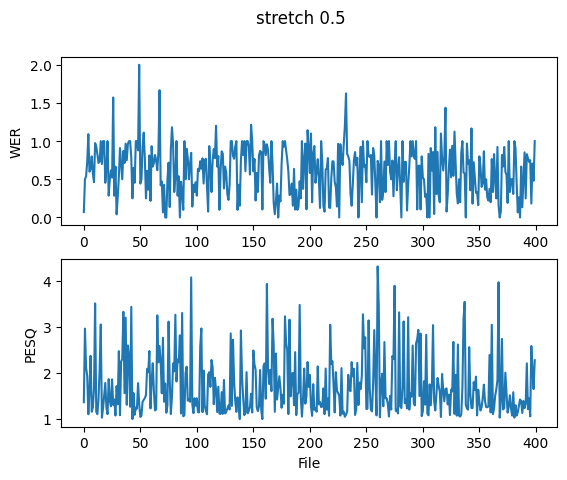

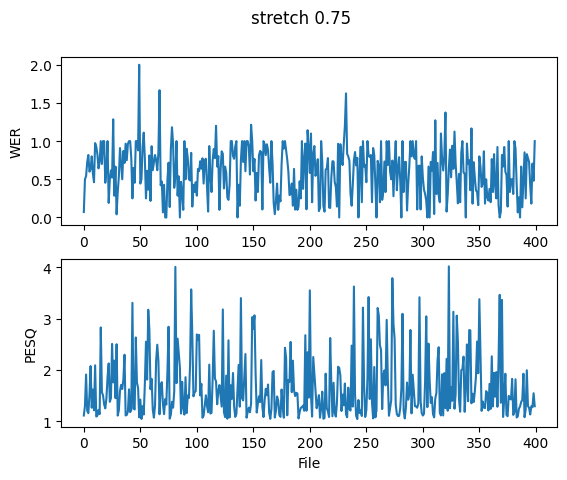

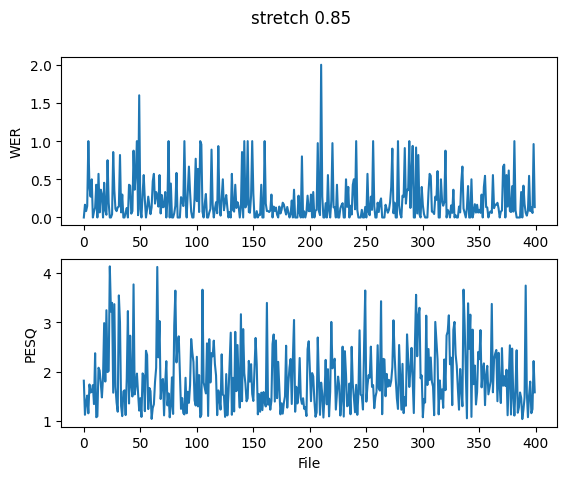

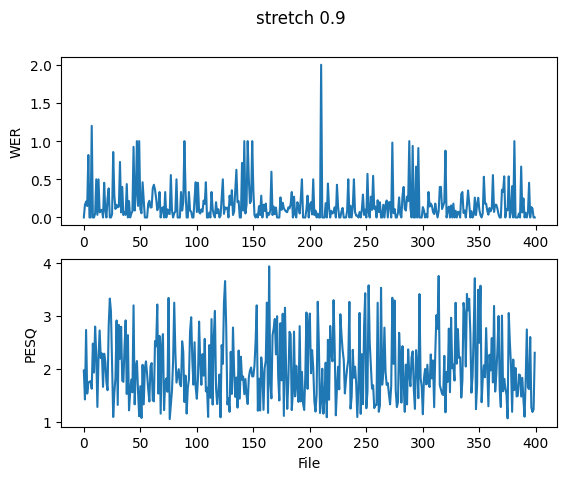

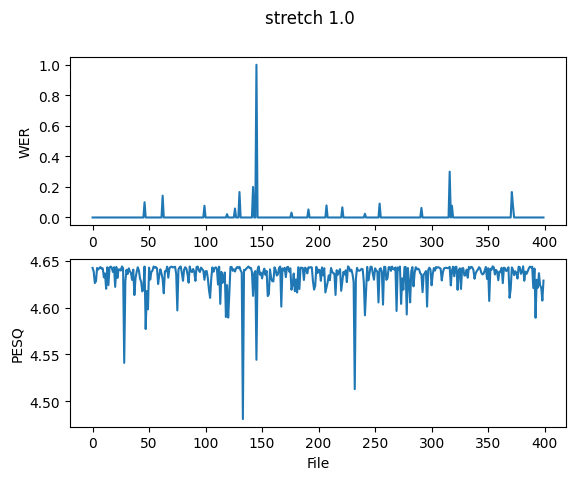

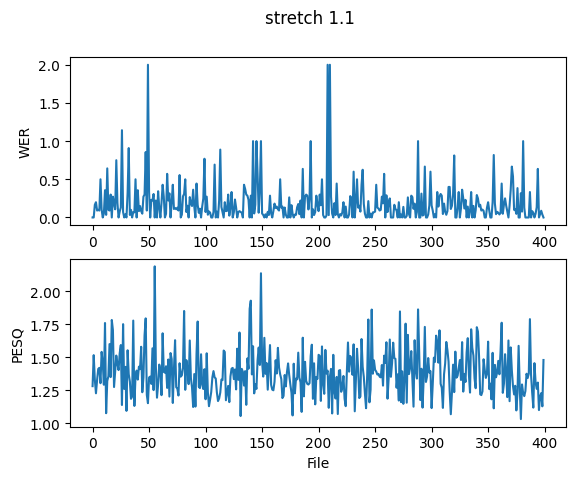

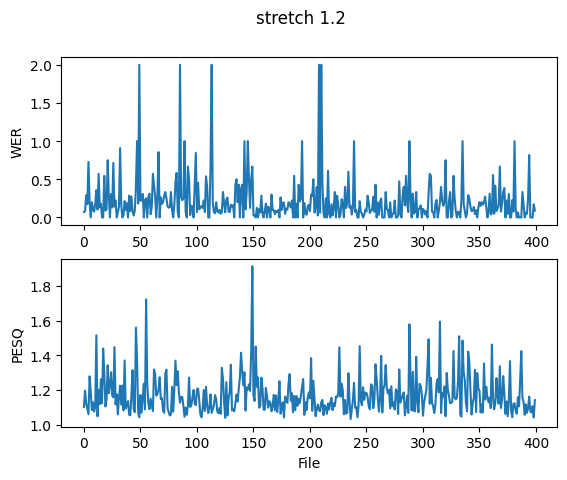

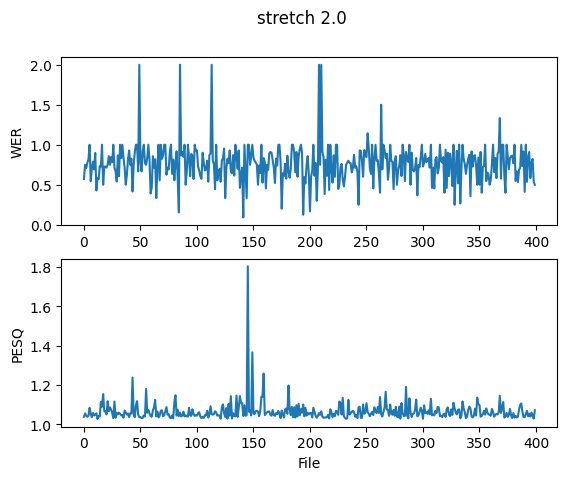

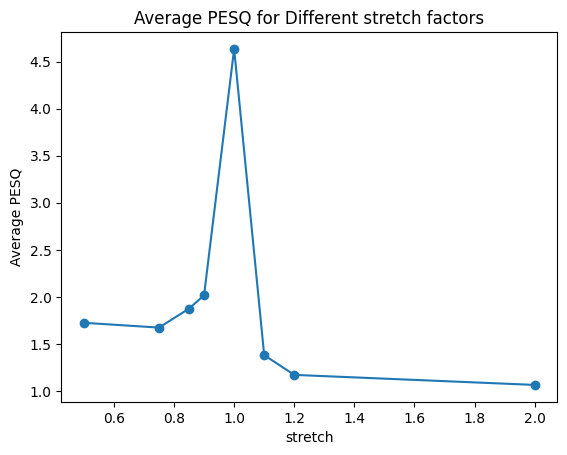

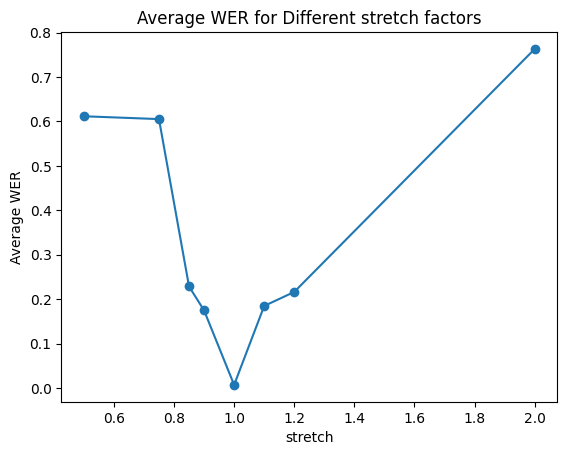

({2.0: {'WER': 0.7632203662027586, 'PESQ': 1.06573575}},
 {2.0: {'WER': [0.5714285714285714,
    0.75,
    0.7083333333333334,
    0.775,
    0.8181818181818182,
    1.0,
    0.5454545454545454,
    0.7,
    0.7894736842105263,
    0.6923076923076923,
    0.8974358974358975,
    0.42857142857142855,
    0.5862068965517241,
    0.5714285714285714,
    0.7333333333333333,
    0.7272727272727273,
    1.0,
    0.5,
    0.7272727272727273,
    0.7272727272727273,
    0.7142857142857143,
    0.75,
    0.8571428571428571,
    0.75,
    0.8461538461538461,
    0.782608695652174,
    1.0,
    0.7142857142857143,
    0.6666666666666666,
    0.5416666666666666,
    0.8666666666666667,
    0.6071428571428571,
    1.0,
    0.8333333333333334,
    1.0,
    0.8387096774193549,
    0.7142857142857143,
    0.5,
    0.625,
    0.8214285714285714,
    0.9285714285714286,
    0.75,
    0.825,
    0.4166666666666667,
    0.75,
    0.9090909090909091,
    1.0,
    1.0,
    0.6666666666666666,
    2.0,
    0

In [2]:


import csv
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

def plot_wer_pesq(output_file_path):
    # Read the output TSV file and extract the data
    with open(output_file_path, "r") as file:
        tsv_file = csv.reader(file, delimiter="\t")
        header = next(tsv_file)  # Skip header row
        data = {column: [] for column in header}
        for line in tsv_file:
            for column, value in zip(header, line):
                data[column].append(value)

    # Convert the data to the appropriate types
    data["WER"] = [float(wer) for wer in data["WER"]]
    data["WER"] = np.clip(data["WER"], 0,2)

    data["PESQ"] = [float(pesq) for pesq in data["PESQ"]]
    data["stretch"] = [float(stretch) for stretch in data["stretch"]]


    # Group the data by stretch
    grouped_data = {}
    for stretch, wer, pesq in zip(data["stretch"], data["WER"], data["PESQ"]):
        if stretch not in grouped_data:
            grouped_data[stretch] = {"WER": [], "PESQ": []}
        grouped_data[stretch]["WER"].append(wer)
        grouped_data[stretch]["PESQ"].append(pesq)

    # Calculate the average WER and PESQ for each stretch
    avg_data = {}
    for stretch, stretch_data in grouped_data.items():
        avg_wer = np.mean(stretch_data["WER"])
        avg_pesq = np.mean(stretch_data["PESQ"])
        avg_data[stretch] = {"WER": avg_wer, "PESQ": avg_pesq}

    return avg_data, grouped_data

output_file_paths = [
    Path("OUTPUT05stretch.tsv"),
    Path("OUTPUT075stretch.tsv"),
    Path("OUTPUT085stretch.tsv"),
    Path("OUTPUT9stretch.tsv"),
    Path("OUTPUT1stretch.tsv"),
    Path("OUTPUT11stretch.tsv"),
    Path("OUTPUT12stretch.tsv"),
    Path("OUTPUT2stretch.tsv"),
]

# Call the plot_wer_pesq function for each file and collect the results
all_avg_data = {}
for output_file_path in output_file_paths:
    avg_data, grouped_data = plot_wer_pesq(output_file_path)
    all_avg_data.update(avg_data)

    # Plot the data for each stretch
    for stretch, stretch_data in grouped_data.items():
        plt.figure()
        plt.suptitle(f"stretch {stretch}")
        plt.subplot(2, 1, 1)
        plt.plot(stretch_data["WER"])
        plt.ylabel("WER")
        plt.subplot(2, 1, 2)
        plt.plot(stretch_data["PESQ"])
        plt.xlabel("File")
        plt.ylabel("PESQ")
        plt.show()

# Plot the average WER data for all stretchs
stretchs = list(all_avg_data.keys())
avg_wers = [data["WER"] for data in all_avg_data.values()]

# Call the plot_wer_pesq function for each file and collect the results
all_avg_data = {}
for output_file_path in output_file_paths:
    avg_data, grouped_data = plot_wer_pesq(output_file_path)
    all_avg_data.update(avg_data)

    # Plot the data for each stretch
    # (same as before)

# Plot the average WER data for all stretchs
stretchs = list(all_avg_data.keys())
avg_wers = [data["WER"] for data in all_avg_data.values()]


# Plot the average PESQ data for all stretchs
avg_pesqs = [data["PESQ"] for data in all_avg_data.values()]

plt.figure()
plt.plot(stretchs, avg_pesqs, 'o-')
plt.xlabel("stretch")
plt.ylabel("Average PESQ")
plt.title("Average PESQ for Different stretch factors")
plt.show()

plt.figure()
plt.plot(stretchs, avg_wers, 'o-')
plt.xlabel("stretch")
plt.ylabel("Average WER")
plt.title("Average WER for Different stretch factors")
plt.show()

output_file_path1 = Path("OUTPUT05stretch.tsv")
output_file_path2 = Path("OUTPUT075stretch.tsv")
output_file_path3 = Path("OUTPUT085stretch.tsv")
output_file_path4 = Path("OUTPUT9stretch.tsv")
output_file_path5 = Path("OUTPUT1stretch.tsv")
output_file_path6 = Path("OUTPUT11stretch.tsv")
output_file_path7 = Path("OUTPUT12stretch.tsv")
output_file_path8 = Path("OUTPUT2stretch.tsv")

plot_wer_pesq(output_file_path)
plot_wer_pesq(output_file_path1)
plot_wer_pesq(output_file_path2)
plot_wer_pesq(output_file_path3)
plot_wer_pesq(output_file_path4)
plot_wer_pesq(output_file_path5)
plot_wer_pesq(output_file_path6)
plot_wer_pesq(output_file_path7)
plot_wer_pesq(output_file_path8)



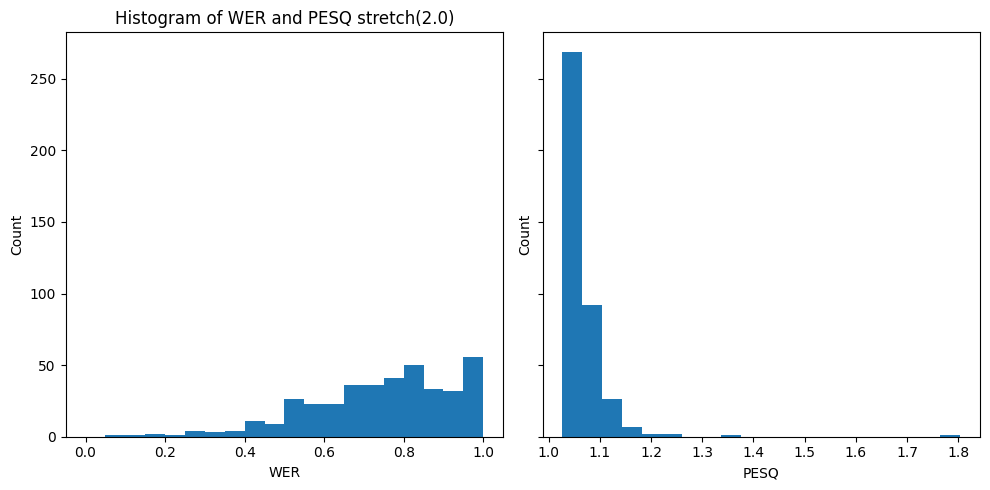

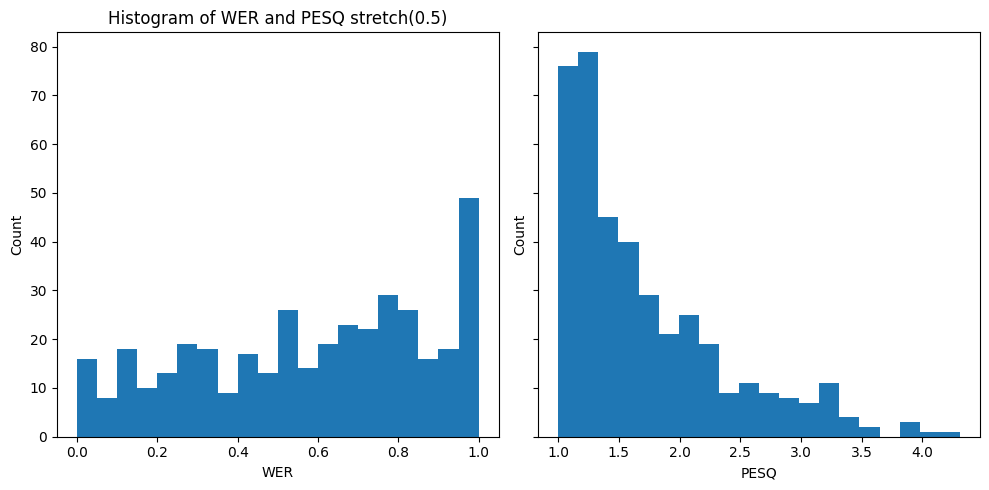

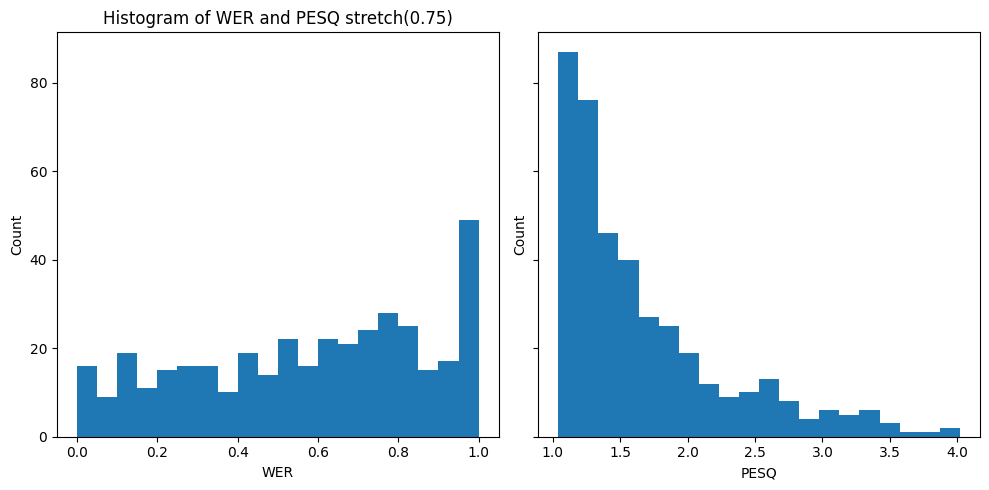

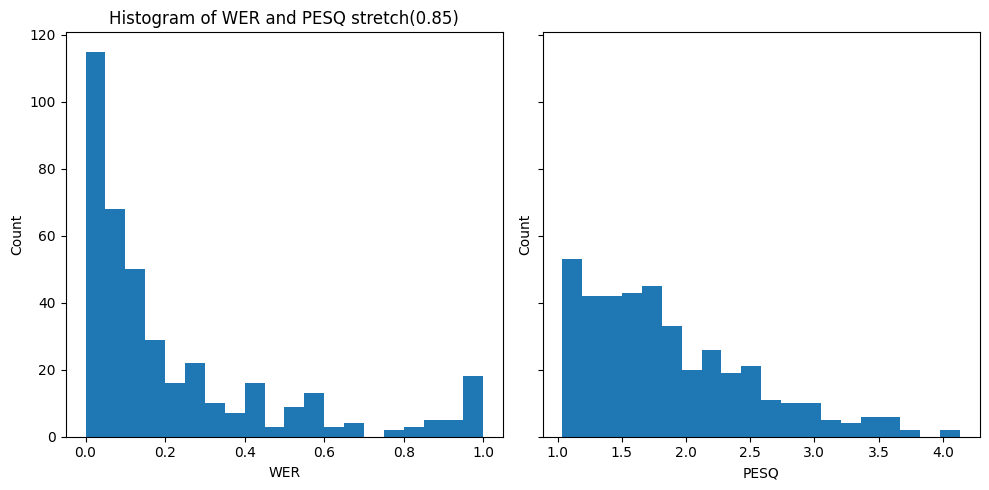

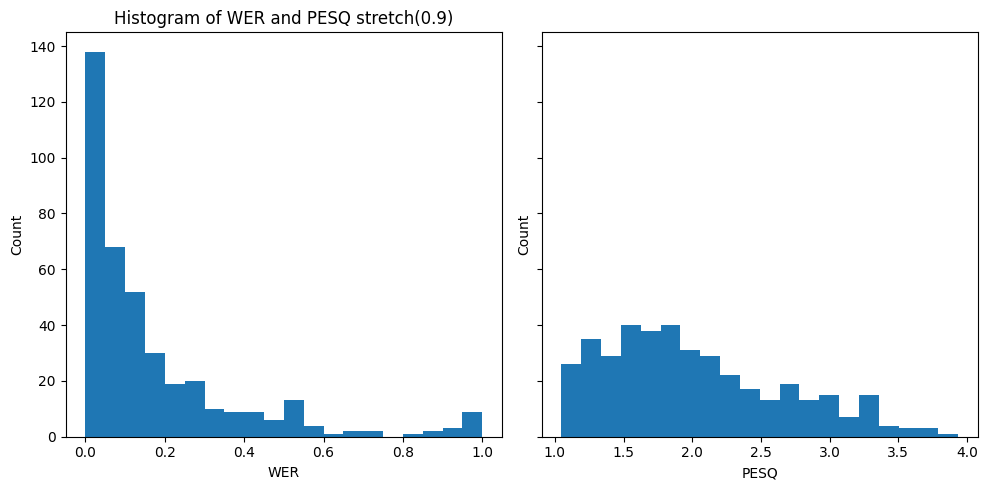

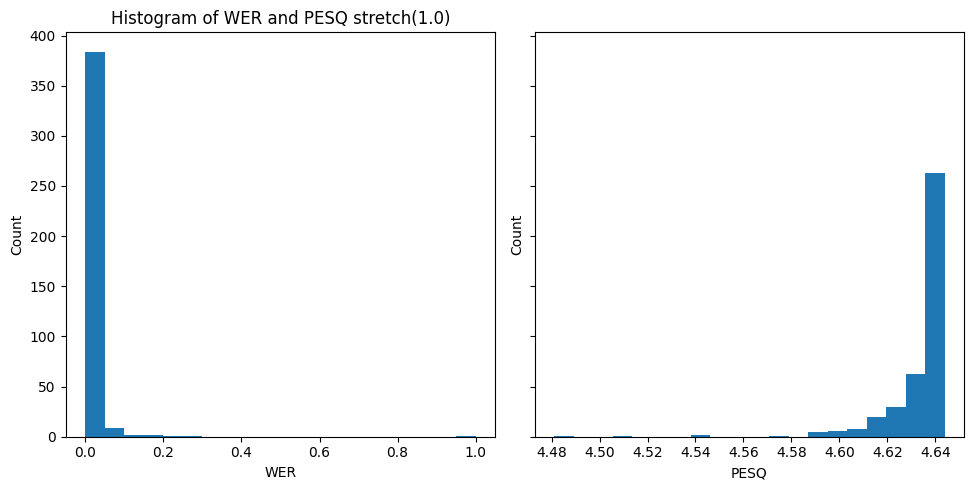

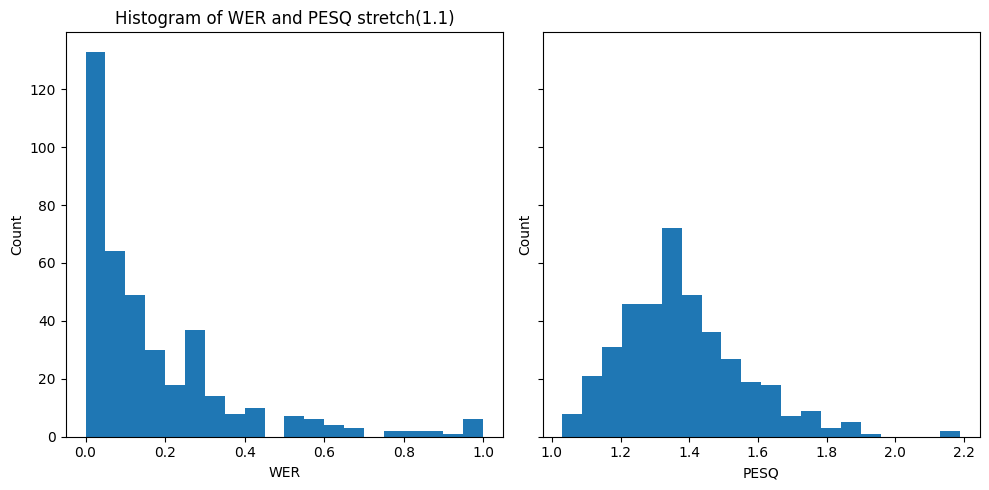

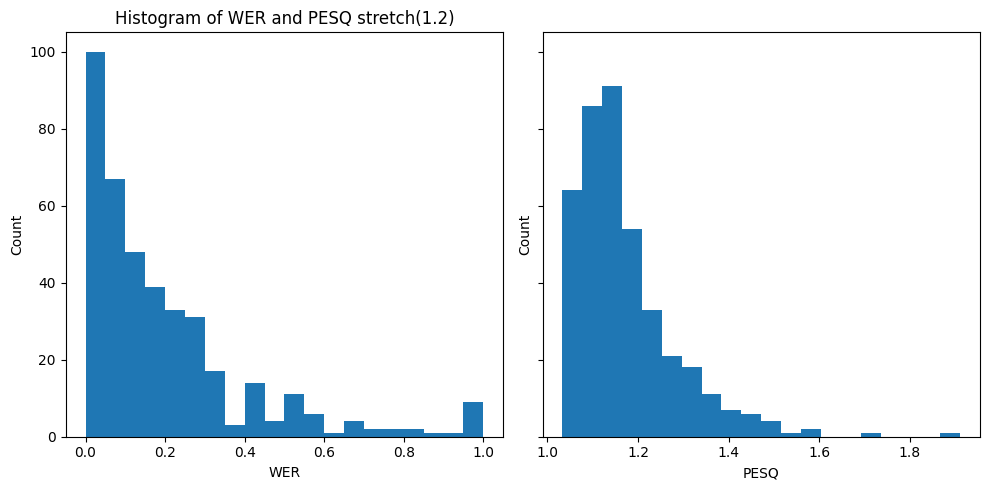

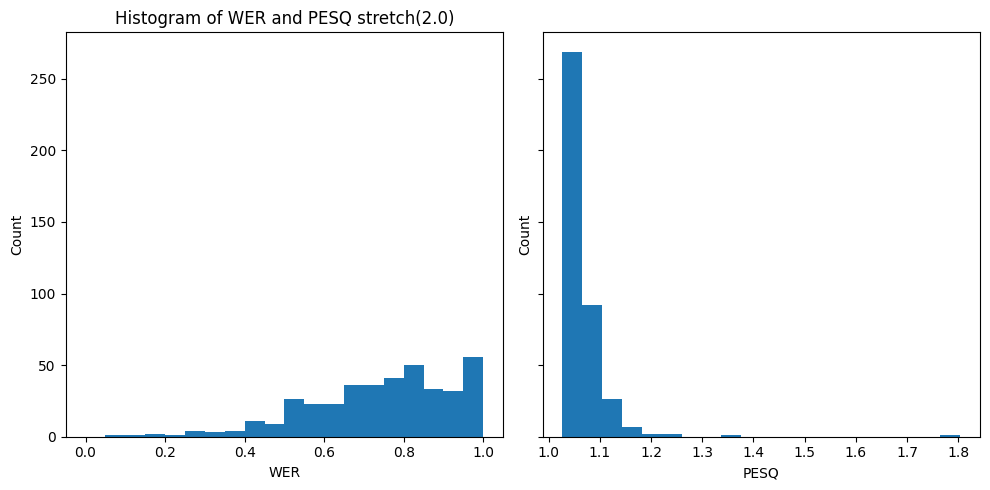

In [9]:
def plot_wer_pesq(output_file_path):
    # Read the output TSV file and group the data by stretch
    with open(output_file_path, "r") as file:
        tsv_file = csv.reader(file, delimiter="\t")
        header = next(tsv_file)  # Skip header row
        data = {column: [] for column in header}
        for line in tsv_file:
            for column, value in zip(header, line):
                data[column].append(value)

    # Convert the data to the appropriate types
    data["WER"] = [float(wer) for wer in data["WER"]]
    data["PESQ"] = [float(pesq) for pesq in data["PESQ"]]
    data["stretch"] = [float(stretch) for stretch in data["stretch"]]


    # Group the data by stretch
    grouped_data = {}
    for stretch, wer, pesq in zip(data["stretch"], data["WER"], data["PESQ"]):
        if stretch not in grouped_data:
            grouped_data[stretch] = {"WER": [], "PESQ": []}
        grouped_data[stretch]["WER"].append(wer)
        grouped_data[stretch]["PESQ"].append(pesq)

    # Create subplots for each stretch level
    num_stretchs = len(grouped_data)
    if num_stretchs == 1:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
        axs = [axs]
    else:
        fig, axs = plt.subplots(num_stretchs, 2, figsize=(10, 10), sharey=True)

    for i, (stretch, stretch_data) in enumerate(grouped_data.items()):
        # Create histograms for WER and PESQ scores
        axs[i][0].hist(stretch_data["WER"], range=(0, 1), bins=20)
        axs[i][1].hist(stretch_data["PESQ"], bins=20)

        # Add labels and titles
        axs[i][0].set_xlabel("WER")
        axs[i][1].set_xlabel("PESQ")
        if num_stretchs == 1:
            axs[i][0].set_title(F"Histogram of WER and PESQ stretch({stretch})")
        else:
            axs[i][0].set_title(f"Histogram of WER (stretch {stretch})")
            axs[i][1].set_title(f"Histogram of PESQ (stretch {stretch})")
        axs[i][0].set_ylabel("Count")
        axs[i][1].set_ylabel("Count")

    plt.tight_layout()
    plt.show()


output_file_path1 = Path("OUTPUT05stretch.tsv")
output_file_path2 = Path("OUTPUT075stretch.tsv")
output_file_path3 = Path("OUTPUT085stretch.tsv")
output_file_path4 = Path("OUTPUT9stretch.tsv")
output_file_path5 = Path("OUTPUT1stretch.tsv")
output_file_path6 = Path("OUTPUT11stretch.tsv")
output_file_path7 = Path("OUTPUT12stretch.tsv")
output_file_path8 = Path("OUTPUT2stretch.tsv")

plot_wer_pesq(output_file_path)
plot_wer_pesq(output_file_path1)
plot_wer_pesq(output_file_path2)
plot_wer_pesq(output_file_path3)
plot_wer_pesq(output_file_path4)
plot_wer_pesq(output_file_path5)
plot_wer_pesq(output_file_path6)
plot_wer_pesq(output_file_path7)
plot_wer_pesq(output_file_path8)


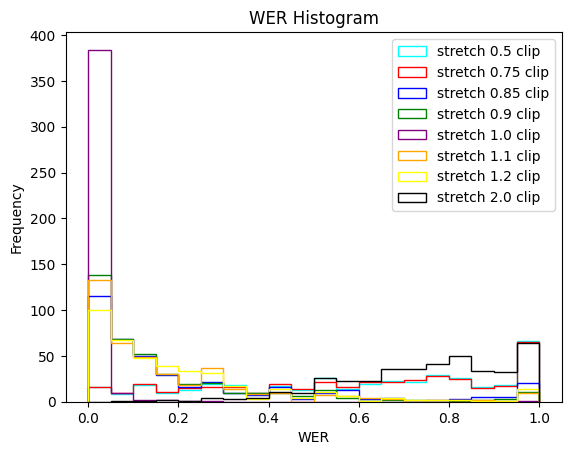

In [14]:

import numpy as np
import csv
import matplotlib.pyplot as plt
from pathlib import Path

def plot_wer(output_file_path):
    # Read the output TSV file and group the data by stretch
    with open(output_file_path, "r") as file:
        tsv_file = csv.reader(file, delimiter="\t")
        header = next(tsv_file)  # Skip header row
        data = {column: [] for column in header}
        for line in tsv_file:
            for column, value in zip(header, line):
                data[column].append(value)

    # Convert the data to the appropriate types
    data["WER"] = [float(wer) for wer in data["WER"]]
    data["stretch"] = [float(stretch) for stretch in data["stretch"]]


    # Limit WER values to be from -1 to 1
    data["WER"] = np.clip(data["WER"], 0, 1)

    return data["stretch"], data["WER"]

# Define colors for each stretch value
stretch_colors = {0.5: 'cyan', 0.75: 'red', 0.85: 'blue', 0.9: 'green', 1: 'purple', 1.1: 'orange', 1.2: 'yellow', 2: 'black'}

output_file_paths = [
    Path("OUTPUT05stretch.tsv"),
    Path("OUTPUT075stretch.tsv"),
    Path("OUTPUT085stretch.tsv"),
    Path("OUTPUT9stretch.tsv"),
    Path("OUTPUT1stretch.tsv"),
    Path("OUTPUT11stretch.tsv"),
    Path("OUTPUT12stretch.tsv"),
    Path("OUTPUT2stretch.tsv"),
]

wer_data = {}
for output_file_path in output_file_paths:
    stretch, wer = plot_wer(output_file_path)
    for stretch_value, wer_value in zip(stretch, wer):
        if stretch_value not in wer_data:
            wer_data[stretch_value] = []
        wer_data[stretch_value].append(wer_value)

plt.figure()
binwidth = 0.05
bins = np.arange(0, 1 + binwidth, binwidth)

for stretch_value, wer_values in wer_data.items():
    color = stretch_colors[stretch_value]
    plt.hist(wer_values, bins=bins, color=color, histtype='step', label=f'stretch {stretch_value} clip')

#plt.ylim(0, 250)

plt.xlabel("WER")
plt.ylabel("Frequency")
plt.title("WER Histogram")
plt.legend()
plt.show()


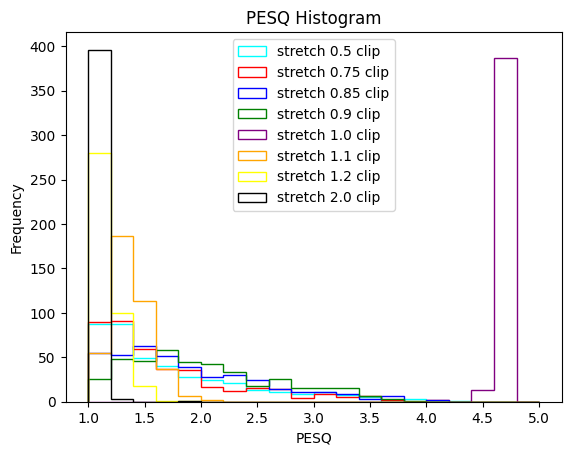

In [15]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from pathlib import Path

def plot_pesq(output_file_path):
    # Read the output TSV file and group the data by stretch
    with open(output_file_path, "r") as file:
        tsv_file = csv.reader(file, delimiter="\t")
        header = next(tsv_file)  # Skip header row
        data = {column: [] for column in header}
        for line in tsv_file:
            for column, value in zip(header, line):
                data[column].append(value)

    # Convert the data to the appropriate types
    data["WER"] = [float(wer) for wer in data["WER"]]
    data["PESQ"] = [float(pesq) for pesq in data["PESQ"]]
    data["stretch"] = [float(stretch) for stretch in data["stretch"]]


    # Limit WER values to be from -1 to 1
    data["WER"] = np.clip(data["WER"], -1, 1)

    return data["stretch"], data["PESQ"]

# Define colors for each stretch value
stretch_colors = {0.5: 'cyan', 0.75: 'red', 0.85: 'blue', 0.9: 'green', 1: 'purple', 1.1: 'orange', 1.2: 'yellow', 2: 'black'}

output_file_paths = [
    Path("OUTPUT095stretch.tsv"),
    Path("OUTPUT098stretch.tsv"),
    Path("OUTPUT102stretch.tsv"),
    Path("OUTPUT105stretch.tsv")
]

pesq_data = {}
for output_file_path in output_file_paths:
    stretch, pesq = plot_pesq(output_file_path)
    for stretch_value, pesq_value in zip(stretch, pesq):
        if stretch_value not in pesq_data:
            pesq_data[stretch_value] = []
        pesq_data[stretch_value].append(pesq_value)

plt.figure()
binwidth = 0.2
bins = np.arange(1, 5 + binwidth, binwidth)

for stretch_value, pesq_values in pesq_data.items():
    color = stretch_colors[stretch_value]
    plt.hist(pesq_values, bins=bins, color=color, histtype='step', label=f'stretch {stretch_value} clip')

plt.xlabel("PESQ")
plt.ylabel("Frequency")
plt.title("PESQ Histogram")
plt.legend()
plt.show()


/tmp/ipykernel_1320/3450164436.py:50: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(avg_pesq, avg_wer, c=['black'], marker='x', s=400, zorder=2, linewidths=2, edgecolors='black')


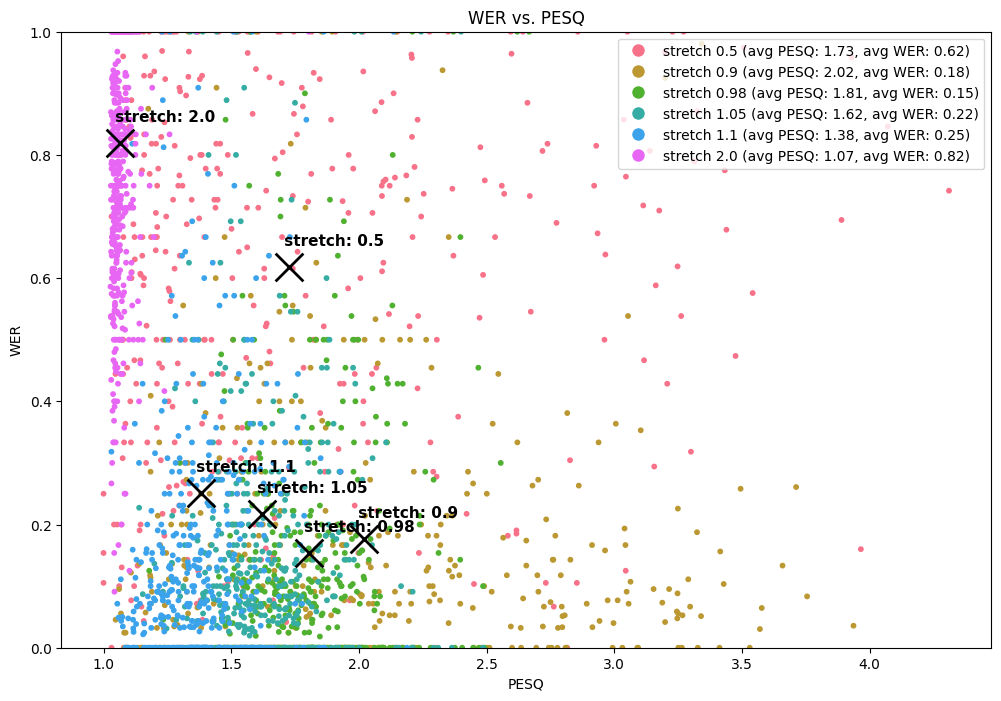

In [8]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

def plot_wer_pesq(output_file_paths):
    grouped_data = {}
    
    for output_file_path in output_file_paths:
        with open(output_file_path, "r") as file:
            tsv_file = csv.reader(file, delimiter="\t")
            header = next(tsv_file)
            for line in tsv_file:
                stretch = float(line[3])
                wer = float(line[1])
                pesq = float(line[2])
                
                if stretch not in grouped_data:
                    grouped_data[stretch] = {'WER': [], 'PESQ': []}
                
                grouped_data[stretch]['WER'].append(wer) 
                grouped_data[stretch]['PESQ'].append(pesq)
    
    stretch_levels = sorted(grouped_data.keys())
    rgb_values = sns.color_palette("husl", len(stretch_levels))
    stretch_colors = dict(zip(stretch_levels, rgb_values))

    X_colors = {
        0.98: '#4AFF68',
        0.9: '#4AFF68',
        1.05: '#4AFF68',
        1:      '#0A0A0A',
        1.1: '#4AFF68',
        2: '#FA1919',
        0.5: '#FA1919'
    }

    plt.figure(figsize=(12, 8))
    
    avg_values = []

    for stretch, data in grouped_data.items():
        wer = np.array(data['WER'])
        pesq = np.array(data['PESQ'])
        avg_wer = np.mean(wer)
        avg_pesq = np.mean(pesq)
        
        plt.scatter(pesq, wer, c=[stretch_colors[stretch]] * len(wer), label=f'stretch {stretch}', s=10, zorder=1)
        plt.scatter(avg_pesq, avg_wer, c=['black'], marker='x', s=400, zorder=2, linewidths=2, edgecolors='black')
        plt.text(avg_pesq - 0.04, avg_wer + 0.03, f' stretch: {stretch}', fontsize=11, fontweight='bold', verticalalignment='bottom', zorder=3)
        avg_values.append((stretch, avg_pesq, avg_wer))

    plt.xlabel("PESQ")
    plt.ylabel("WER")
    plt.ylim(0,1)
    plt.title("WER vs. PESQ")
    
    legend_elements = [
        plt.Line2D(
            [0], [0], marker='o', color='w', label=f'stretch {x[0]} (avg PESQ: {x[1]:.2f}, avg WER: {x[2]:.2f})', 
            markerfacecolor=stretch_colors[x[0]], markersize=10
        ) for x in avg_values
    ]

    plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.0, 1.0))
    plt.show()

output_file_paths = [
    Path("OUTPUT05stretch.tsv"),
    Path("OUTPUT9stretch.tsv"),
    Path("OUTPUT098stretch.tsv"),    
    Path("OUTPUT105stretch.tsv"),
    Path("OUTPUT11stretch.tsv"),
    Path("OUTPUT2stretch.tsv"),
    #Path("OUTPUT1stretch.tsv"),
]

plot_wer_pesq(output_file_paths)
